# The Wilson-Cowan model

In this notebook, the basic use of the implementation of the Wilson-Cowan (`wc`) model is presented. 

In the `wc` model, the activity of a particular brain region is defined by a coupled system of excitatory (E) and inhibitory (I) neuronal populations with the mean firing rates of the E and I pools being the dynamic variables, as first described by Wilson and Cowan in 1972 ( H.R. Wilson and J.D. Cowan. *Excitatory and inhibitory interactions in localized populations of model neurons*. Biophys. J., 12:1–24 (1972)) 

In [ ]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

# Bifurcation diagram

In [20]:
wc = WCModel()
wc.params['duration'] = 2.0*1000

Let's draw a simple one-dimensional bifurcation diagram of this model to orient ourselves in the parameter space

In [28]:
max_x = []
min_x = []
# these are the different input values that we want to scan
x_inputs = np.linspace(0, 3.5, 50)
for x_ext in x_inputs:
    # Note: this has to be a vector since it is input for all nodes
    # (but we have only one node in this example)
    wc.params['x_ext'] = [x_ext]
    wc.run()
    # we add the maximum and the minimum of the last second of the 
    # simulation to a list
    max_x.append(np.max(wc.x[0, -int(1000/wc.params['dt']):]))
    min_x.append(np.min(wc.x[0, -int(1000/wc.params['dt']):]))

Text(0, 0.5, 'Min / max x')

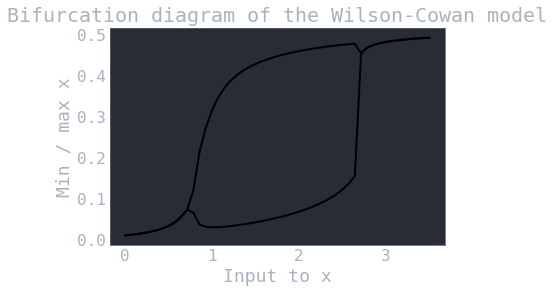

In [31]:
plt.plot(x_inputs, max_x, c='k', lw = 2)
plt.plot(x_inputs, min_x, c='k', lw = 2)
plt.title("Bifurcation diagram of the Wilson-Cowan model")
plt.xlabel("Input to x")
plt.ylabel("Min / max x")

# Single node simulation

In [7]:
wc = WCModel()
wc.params['duration'] = 2.0*1000

Let's draw a simple one-dimensional bifurcation diagram of this model to orient ourselves in the parameter space

In [5]:
max_x = []
min_x = []
# these are the different input values that we want to scan
x_inputs = np.linspace(0, 3.5, 50)
for x_ext in x_inputs:
    # Note: this has to be a vector since it is input for all nodes
    # (but we have only one node in this example)
    wc.params['x_ext'] = [x_ext]
    wc.run()
    # we add the maximum and the minimum of the last second of the 
    # simulation to a list
    max_x.append(np.max(wc.x[0, -int(1000/wc.params['dt']):]))
    min_x.append(np.min(wc.x[0, -int(1000/wc.params['dt']):]))

Text(0, 0.5, 'Min / max x')

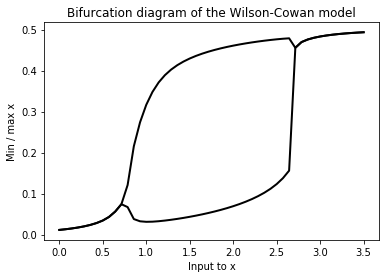

In [6]:
plt.plot(x_inputs, max_x, c='k', lw = 2)
plt.plot(x_inputs, min_x, c='k', lw = 2)
plt.title("Bifurcation diagram of the Wilson-Cowan model")
plt.xlabel("Input to x")
plt.ylabel("Min / max x")

# Single node simulation

In [7]:
wc = WCModel()
wc.params['duration'] = 1.0*1000
wc.params['sigma_ou'] = 0.01

wc.run()

Text(0, 0.5, 'Activity')

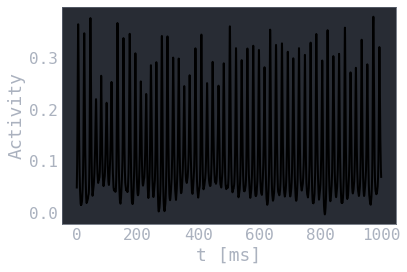

In [8]:
plt.plot(wc.t, wc.x.T, c='k', lw = 2)
plt.xlabel("t [ms]")
plt.ylabel("Activity")

# Brain network

In [39]:
from neurolib.utils.loadData import Dataset

ds = Dataset("hcp")

In [40]:
wc = WCModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

In [71]:
wc.params['x_ext'] = [0.65] * wc.params['N']

wc.params['signalV'] = 0
wc.params['duration'] = 20 * 1000 
wc.params['sigma_ou'] = 0.14
wc.params['K_gl'] = 3.15


wc.run(chunkwise=True)

(0, 200)

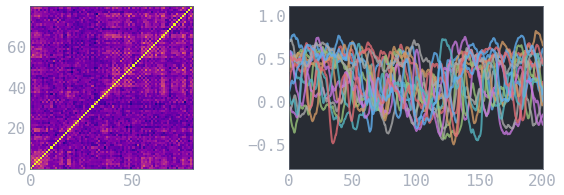

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(func.fc(wc.x[:, -10000:]))
axs[1].plot(wc.t, wc.x[::5, :].T, alpha=0.8);
axs[1].set_xlim(0, 200)

In [73]:
scores = [func.matrix_correlation(func.fc(wc.x[:, -int(5000/wc.params['dt']):]), fcemp) for fcemp in ds.FCs]
print("Correlation per subject:", [f"{s:.2}" for s in scores])
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

Correlation per subject: ['0.38', '0.45', '0.44', '0.42', '0.42', '0.43', '0.48']
Mean FC/FC correlation: 0.43
